<a href="https://colab.research.google.com/github/jjrodcast/Trabajo-Machine-Learning/blob/master/Food_Demand_Forecasting_(Course_Work).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Food Demand Forecasting**

##1. Entendimiento del problema



###1.1. Panorama general

El pronóstico de demanda es muy importante para el crecimiento de los negocios en línea. Sin los procesos de previsión de demanda correctos, puede ser casi imposible tener la cantidad adecuada de insumos en un momento dado.

Entrando en detalle, un servicio de entrega de alimentos tiene que lidiar con muchas cantidades de materias primas, lo cuál es un indicador muy importante para que las empresas tenga con la mayor precisión posible la demanda diaria y mensual. El hecho de tener demasiado inventario en el almacén significa un mayor riesgo de desperdicio de materia prima, por otro lado el poco inventario podría llevar a la falta de abastecimiento lo que podría resultar en un mayor problema el cual es, hacer que los clientes busquen soluciones en nuestros competidores



###1.2. Planteamiento del problema

El cliente que se tiene es una ***empresa de entrega de comida*** que opera en distintas ciudades. Dicha empresa tiene varios centros de cumplimiento en dichas ciudades para enviar comida a sus clientes. Se quiere tener un ***pronóstico de la demanda de dichos centros*** para las próximas semanas, de tal manera que puedan ***planificar el stock de materias primas***.

Tener en cuenta que, la reposición de las materias primas se realiza semanalmente y, debido a que la materia prima es perecedera, la planificación de las adquisiciones es de suma importancia. También, la asignación de personal de cada centro es un importante para que el pronóstico sea realmente útil.

**Objetivo:** Predecir la demanda para las próximas 10 semanas para la combinación de los alimentos de los centros en el conjunto de entrenamiento.

##2. Pre-Procesamiento de datos

In [0]:
!mkdir data
!wget "https://drive.google.com/uc?export=download&id=1EG9_l6a5rRlTSzEwlNijqLuY7bxW_iuP" -O data/fulfilment_center_info.csv
!wget "https://drive.google.com/uc?export=download&id=19v-eC9LKjbAH0DMqQpi8Sb0XVxnNm9uq" -O data/meal_info.csv
!wget "https://drive.google.com/uc?export=download&id=1-zCbExblslglkus85ZCTNWwDh3TiEgkl" -O data/test.csv
!wget "https://drive.google.com/uc?export=download&id=1DZj2egxfzXYltmL_1M_atDHXMwz6IsR_" -O data/train.csv

--2020-04-09 22:15:13--  https://drive.google.com/uc?export=download&id=1EG9_l6a5rRlTSzEwlNijqLuY7bxW_iuP
Resolving drive.google.com (drive.google.com)... 172.217.204.113, 172.217.204.100, 172.217.204.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bmvr1k0ljvgs9b6hi8t8ph1fjbcgr6bm/1586470500000/01100318546325464434/*/1EG9_l6a5rRlTSzEwlNijqLuY7bxW_iuP?e=download [following]
--2020-04-09 22:15:14--  https://doc-0c-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bmvr1k0ljvgs9b6hi8t8ph1fjbcgr6bm/1586470500000/01100318546325464434/*/1EG9_l6a5rRlTSzEwlNijqLuY7bxW_iuP?e=download
Resolving doc-0c-00-docs.googleusercontent.com (doc-0c-00-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-0c-00-docs.googleusercontent.com (d

In [0]:
# Importamos las librerias 
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###2.1. Información del conjunto de entrenamiento

In [0]:
# Cargamos los datos 
fulfilment_center_info = pd.read_csv('data/fulfilment_center_info.csv')
meal_info = pd.read_csv('data/meal_info.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [0]:
# Mostramos los primeros datos de entrenamiento
print("Total de registros Train set: ", train.shape)
train.head(10)

Total de registros Train set:  (456548, 9)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
5,1270037,1,55,1248,251.23,252.23,0,0,28
6,1191377,1,55,1778,183.36,184.36,0,0,190
7,1499955,1,55,1062,182.36,183.36,0,0,391
8,1025244,1,55,2707,193.06,192.06,0,0,472
9,1054194,1,55,1207,325.92,384.18,0,1,676


In [0]:
# Mostramos información de los regitros de entrenamiento
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [0]:
# Analizamos los tipos de datos en el dataset de entrenamiento.
train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [0]:
# Realizamos una rápida visualización de la distribución de los datos.
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


###2.2. Información del conjunto de pruebas

In [0]:
# Mostramos los primeros datos de pruebas
print("Total de registros Test set: ", test.shape)
test.head(10)

Total de registros Test set:  (32573, 8)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
5,1284113,146,55,1778,190.15,190.15,0,0
6,1197966,146,55,1062,191.09,192.09,0,0
7,1132739,146,55,2707,242.56,240.56,0,0
8,1057981,146,55,1207,360.90,360.90,0,0
9,1095932,146,55,1230,383.18,384.18,0,0


In [0]:
# Mostramos información de los registros de pruebas
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [0]:
# Analizamos los tipos de datos en el dataset de pruebas
test.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
dtype: object

###2.3. Información de los centros y comidas

In [0]:
# Mostramos primeros datos de los centros
print(fulfilment_center_info.shape)
fulfilment_center_info.head()

(77, 5)


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [0]:
# Mostramos información de los centros
fulfilment_center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [0]:
# Valores únicos de centros
fulfilment_center_info.nunique()

center_id      77
city_code      51
region_code     8
center_type     3
op_area        30
dtype: int64

In [0]:
# Mostramos primeros datos de alimentos
print(meal_info.shape)
meal_info.head()

(51, 3)


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [0]:
# Mostramos información de los alimentos
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [0]:
# Valores únicos de comidas
meal_info.nunique()

meal_id     51
category    14
cuisine      4
dtype: int64

###2.4. Verificación de datos faltantes

In [0]:
# Verificamos si hay valores nulos en el conjunto de entrenamiento
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [0]:
# Verificamos si hay valores nulos en centros
fulfilment_center_info.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [0]:
# Verificamos si hay valores nulos en comidas
meal_info.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

###2.5. Combinamos la data de entrenamiento, centros y comidas

In [0]:
# Juntamos los datos en un solo archivo
dataset = pd.merge(train, fulfilment_center_info, how='inner', left_on='center_id', right_on='center_id')
dataset = pd.merge(dataset, meal_info, how='inner', left_on='meal_id', right_on='meal_id')
print(dataset.shape)
dataset.tail()

(456548, 15)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
456543,1437396,141,61,2104,583.03,630.53,0,1,13,473,77,TYPE_A,4.5,Fish,Continental
456544,1060716,142,61,2104,581.03,582.03,0,0,42,473,77,TYPE_A,4.5,Fish,Continental
456545,1029231,143,61,2104,583.03,581.03,0,0,40,473,77,TYPE_A,4.5,Fish,Continental
456546,1141147,144,61,2104,582.03,581.03,0,0,53,473,77,TYPE_A,4.5,Fish,Continental
456547,1443704,145,61,2104,581.03,582.03,0,0,27,473,77,TYPE_A,4.5,Fish,Continental


In [0]:
# Analizamos los datos a alto nivel
dataset.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [0]:
# Verificamos los tipos de datos, y que no existan datos nulos o NaN.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

###2.6. Eliminación de columnas

In [0]:
# Eliminanos 'id'
dataset.drop(['id'], axis=1, inplace=True)

###2.7. Análisis de variables y Visualizaciones

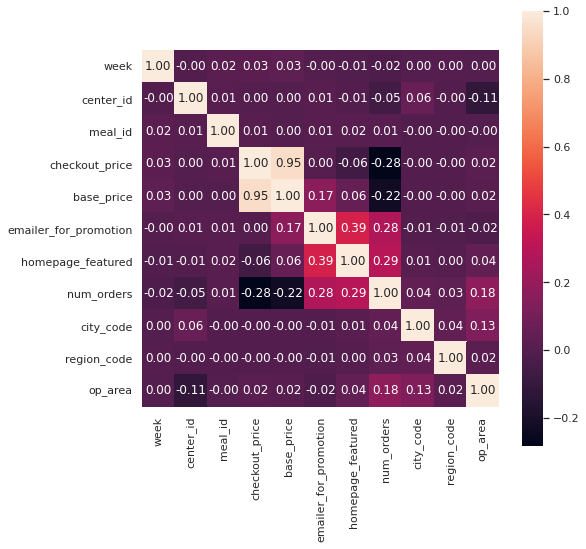

In [0]:
# Creación de correlación
plt.figure(figsize=(8, 8))
correlation = dataset.corr(method='pearson')
sns.heatmap(correlation, cbar=True, annot=True,square=True ,fmt='.2f')

En el gráfico se puede apreciar que hay una correlación alta entre las variables ***checkout_price*** y ***base_price*** (0.95), por lo cual nos quedaremos con ***checkout_price*** ya que contiene el precio total (impuestos, descuentos y costo de envío)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

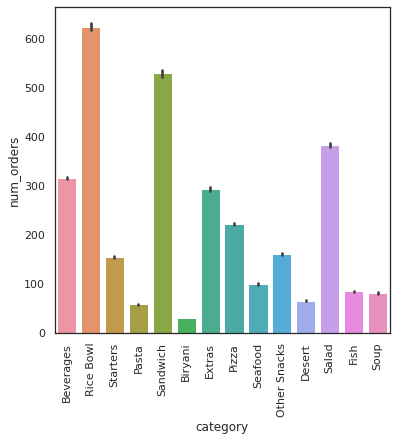

In [0]:
# Visualización de Cantidad de Pedidos vs Categorias
plt.figure(figsize=(6, 6))
sns.barplot(dataset['category'], dataset['num_orders'])
plt.xticks(rotation = 90)

Podemos visualizar que las tres categorías más solicitadas son ***rice bowl*** , ***sandwich*** y ***salad***

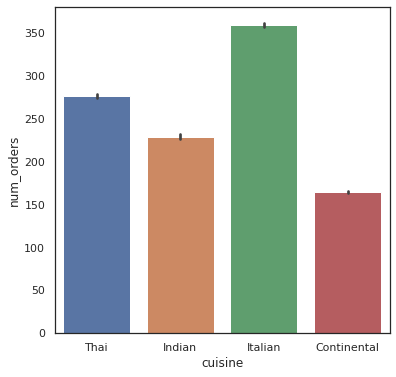

In [0]:
# Visualización de Cantidad de Pedidos vs Cocinas
plt.figure(figsize=(6, 6))
sns.barplot(dataset['cuisine'], dataset['num_orders'])

Podemos visualizar que la cocina que prefieren los consumidores de esta empresa es la ***Italiana***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

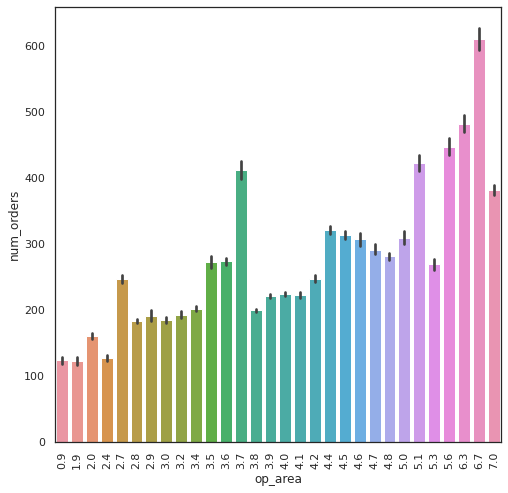

In [0]:
# Visualización de Cantidad de Pedidos vs Centros
plt.figure(figsize=(8, 8))
sns.barplot(dataset['op_area'], dataset['num_orders'])
plt.xticks(rotation = 90)

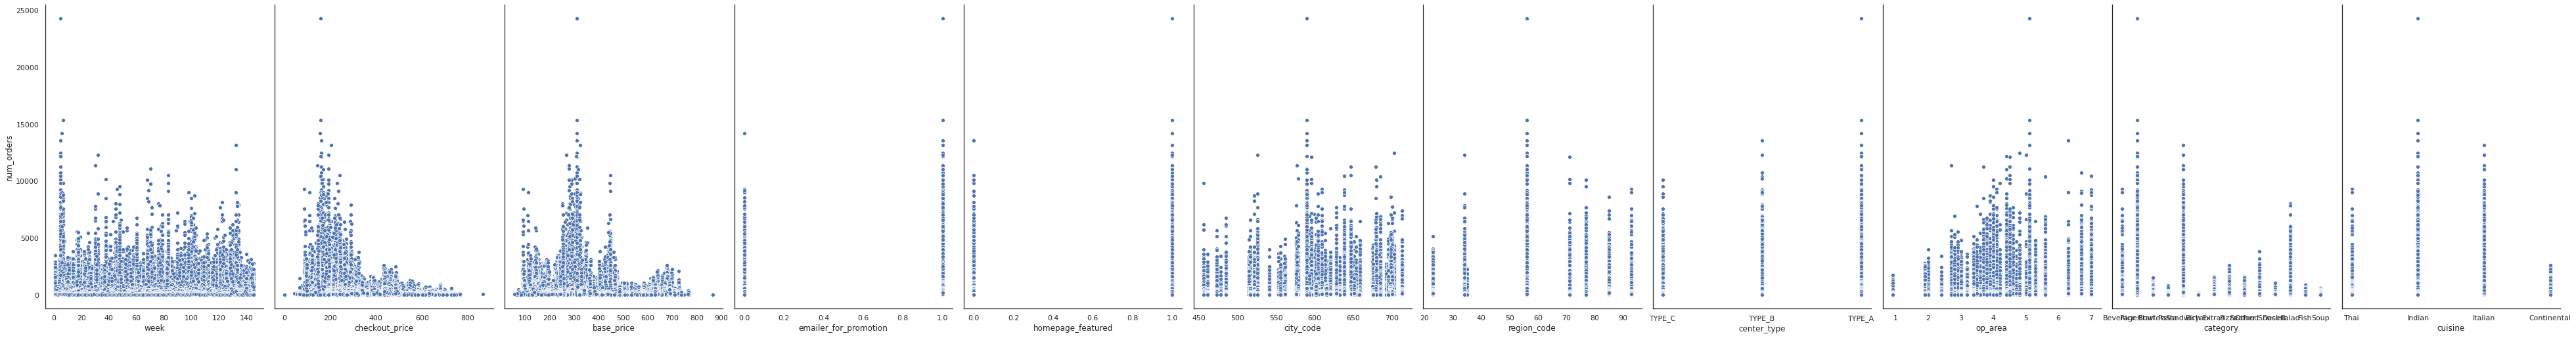

In [0]:
# Visualizamos las variables vs target
p = sns.pairplot(dataset, x_vars=['week','checkout_price','base_price','emailer_for_promotion','homepage_featured','city_code','region_code','center_type','op_area','category','cuisine'], y_vars='num_orders', height=7, aspect=0.7)

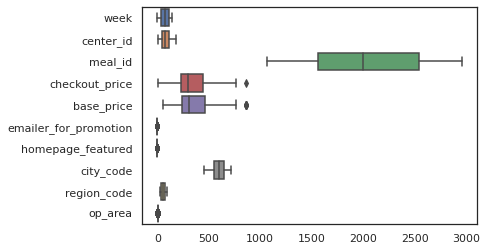

In [0]:
# Visualizamos el boxplot de las variables.
sns.boxplot(data=dataset.drop(columns=["num_orders"]), orient="h")

###2.8. Eliminación de outliers

In [0]:
# Como se pudo visualizar en el pairplot, tenemos un outlier cuyo valor
# aproximado en número de pedidos es mayor a 15000
dataset = dataset[dataset['num_orders'] <= 15000]

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456546 entries, 0 to 456547
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   456546 non-null  int64  
 1   center_id              456546 non-null  int64  
 2   meal_id                456546 non-null  int64  
 3   checkout_price         456546 non-null  float64
 4   base_price             456546 non-null  float64
 5   emailer_for_promotion  456546 non-null  int64  
 6   homepage_featured      456546 non-null  int64  
 7   num_orders             456546 non-null  int64  
 8   city_code              456546 non-null  int64  
 9   region_code            456546 non-null  int64  
 10  center_type            456546 non-null  object 
 11  op_area                456546 non-null  float64
 12  category               456546 non-null  object 
 13  cuisine                456546 non-null  object 
dtypes: float64(3), int64(8), object(3)
m

###2.10. Escalamiento de datos

In [0]:
# Obtenemos la columnas númericas
numeric_cols = [col for col in dataset.columns \
              if pd.api.types.is_numeric_dtype(dataset[col]) and col != 'num_orders']

# Realizamos el escalamiento de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset[numeric_cols])

for col, scaled_data in zip(numeric_cols, X_scaled.T):
  dataset[col] = scaled_data
 
dataset.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,-1.776508,-0.58958,-0.254532,-1.277693,-1.256046,-0.297179,-0.350116,177,0.686545,-0.034837,TYPE_C,-1.908595,Beverages,Thai
1,-1.752426,-0.58958,-0.254532,-1.284232,-1.256046,-0.297179,-0.350116,323,0.686545,-0.034837,TYPE_C,-1.908595,Beverages,Thai
2,-1.728344,-0.58958,-0.254532,-1.303259,-1.370347,-0.297179,-0.350116,96,0.686545,-0.034837,TYPE_C,-1.908595,Beverages,Thai
3,-1.704262,-0.58958,-0.254532,-1.284035,-1.364498,-0.297179,-0.350116,163,0.686545,-0.034837,TYPE_C,-1.908595,Beverages,Thai
4,-1.680180,-0.58958,-0.254532,-1.214465,-1.285850,-0.297179,-0.350116,215,0.686545,-0.034837,TYPE_C,-1.908595,Beverages,Thai


In [0]:
# Verificamos que el valor de la media sea 0 y la desviación estandar 1.
dataset.describe()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565460e+05,4.565460e+05,4.565460e+05,4.565460e+05,4.565460e+05,4.565460e+05,4.565460e+05,456546.000000,4.565460e+05,4.565460e+05,4.565460e+05
mean,2.584827e-15,1.873986e-14,-1.838500e-13,1.350744e-15,1.967369e-13,3.135957e-13,2.242013e-13,261.787093,6.396246e-15,8.821585e-15,-3.242897e-14
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,393.690576,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.776508e+00,-1.568373e+00,-1.757945e+00,-2.152941e+00,-1.859222e+00,-2.971785e-01,-3.501163e-01,13.000000,-2.198826e+00,-1.905445e+00,-2.916211e+00
25%,-8.613916e-01,-8.505916e-01,-8.518783e-01,-6.753632e-01,-6.885237e-01,-2.971785e-01,-3.501163e-01,54.000000,-7.334803e-01,-1.281909e+00,-4.429714e-01
50%,2.964322e-02,-1.328105e-01,-5.724348e-02,-2.315929e-01,-2.718883e-01,-2.971785e-01,-3.501163e-01,136.000000,-8.389405e-02,-3.483689e-02,-7.656549e-02
75%,8.725140e-01,6.067214e-01,9.401603e-01,7.387911e-01,6.515415e-01,-2.971785e-01,-3.501163e-01,324.000000,7.469721e-01,1.155550e+00,3.814419e-01
max,1.691303e+00,2.259793e+00,1.701914e+00,3.491776e+00,3.186447e+00,3.364981e+00,2.856194e+00,14229.000000,1.683585e+00,2.062511e+00,2.671479e+00


###2.9. Creación de dummies

In [0]:
# Creamos los dummies del conjunto de datos
# 1. Convertimos todas las columnas a categóricas.
for n, col in dataset.items():
    if not pd.api.types.is_numeric_dtype(col) and n != 'num_orders':
        # Transforma la variable a tipo category
        dataset[n] = col.astype('category')
    
df = dataset.copy()

# 2. Convertir cada columna categórica a numérica.
for n,col in df.items():
    if pd.api.types.is_categorical_dtype(col):
        df[n] = col.cat.codes+1

# 3. Creamos los valores dummies.
X = pd.get_dummies(dataset.drop(['num_orders'], axis=1), drop_first=True)
Y = dataset['num_orders']

X.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,-1.776508,-0.58958,-0.254532,-1.277693,-1.256046,-0.297179,-0.350116,0.686545,-0.034837,-1.908595,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-1.752426,-0.58958,-0.254532,-1.284232,-1.256046,-0.297179,-0.350116,0.686545,-0.034837,-1.908595,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-1.728344,-0.58958,-0.254532,-1.303259,-1.370347,-0.297179,-0.350116,0.686545,-0.034837,-1.908595,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-1.704262,-0.58958,-0.254532,-1.284035,-1.364498,-0.297179,-0.350116,0.686545,-0.034837,-1.908595,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-1.680180,-0.58958,-0.254532,-1.214465,-1.285850,-0.297179,-0.350116,0.686545,-0.034837,-1.908595,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
Y.head()

0    177
1    323
2     96
3    163
4    215
Name: num_orders, dtype: int64

### 2.10. Visualización de correlación

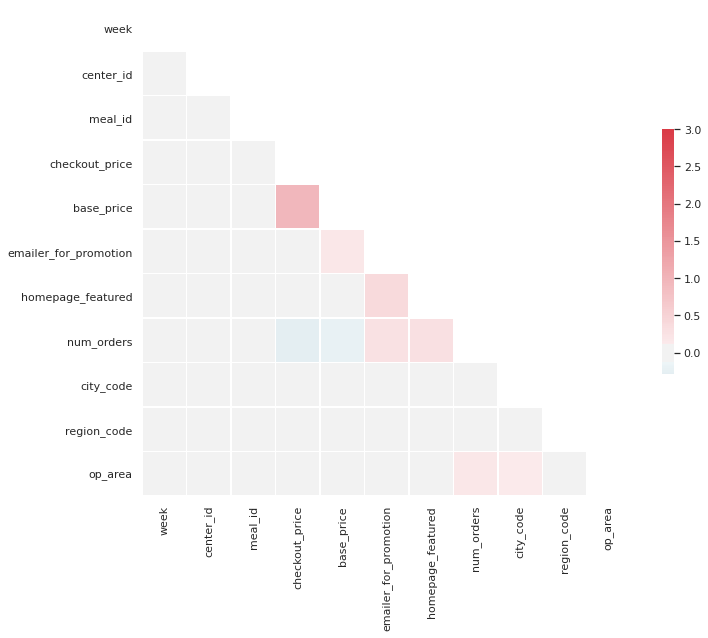

In [0]:
mask = np.ones_like(correlation, dtype=np.bool)
mask = np.triu(mask)
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=3., center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

##4. Métricas de evaluación

##5. Visualización e Interpretación de resultados

In [0]:
X.corr()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
week,1.000000,-0.003456,0.019818,0.026573,-0.000817,-0.008243,0.000403,0.004599,0.001556,0.009278,-0.004501,-0.008558,-0.004501,-0.004190,0.114409,-0.000550,-0.015445,-0.010520,-0.011051,0.053558,-0.010445,-0.008292,-0.000995,-0.014200,-0.014755,0.008291,-0.015935
center_id,-0.003456,1.000000,0.009895,0.001344,0.013671,-0.005032,0.061077,-0.003426,-0.111866,-0.091956,-0.061088,-0.002604,0.004250,-0.051971,-0.003596,0.004672,0.004989,0.007296,0.007127,0.006638,0.007238,0.001414,-0.045336,0.000265,0.007043,0.014692,-0.029823
meal_id,0.019818,0.009895,1.000000,0.010750,0.013395,0.016349,-0.003197,-0.001662,-0.001548,0.004091,-0.008087,-0.156270,0.035379,-0.185007,0.033455,0.154998,-0.075666,0.005602,-0.162006,0.260414,0.080985,0.084959,-0.032146,0.159468,-0.156293,0.096025,0.125013
checkout_price,0.026573,0.001344,0.010750,1.000000,0.004835,-0.057171,-0.004806,-0.003649,0.021574,0.021737,-0.026381,0.168013,0.180387,-0.181958,0.243738,-0.127075,0.105383,0.460531,-0.027003,-0.069730,-0.077478,0.455558,-0.120755,-0.093483,0.031926,-0.186963,-0.459611
emailer_for_promotion,-0.000817,0.013671,0.013395,0.004835,1.000000,0.390508,-0.005231,-0.007461,-0.019477,-0.005056,0.008608,-0.064623,-0.018762,-0.051998,-0.037237,-0.056589,0.014170,0.206923,0.011494,-0.007735,0.049500,0.094463,-0.050218,-0.034304,-0.052218,0.011155,-0.117782
homepage_featured,-0.008243,-0.005032,0.016349,-0.057171,0.390508,1.000000,0.008643,0.003606,0.041487,0.001884,-0.030595,-0.074106,0.004821,-0.050422,-0.033492,0.045821,0.022976,0.107393,-0.018657,-0.039196,0.004288,0.025728,-0.038731,-0.030737,-0.059394,-0.049730,0.040791
city_code,0.000403,0.061077,-0.003197,-0.004806,-0.005231,0.008643,1.000000,0.042686,0.131477,0.004381,0.088260,-0.006409,-0.005043,0.025785,-0.000484,-0.001230,-0.005636,-0.003940,-0.003895,-0.003912,-0.003723,0.002864,0.038829,-0.004886,-0.008285,-0.009569,0.020252
region_code,0.004599,-0.003426,-0.001662,-0.003649,-0.007461,0.003606,0.042686,1.000000,0.023328,-0.055865,0.017814,0.001080,-0.005579,0.018054,-0.014187,0.003160,-0.005467,-0.003024,-0.002913,-0.002485,-0.003063,-0.000111,0.033747,-0.003075,-0.004475,-0.007721,0.021114
op_area,0.001556,-0.111866,-0.001548,0.021574,-0.019477,0.041487,0.131477,0.023328,1.000000,0.358995,-0.392960,0.041362,-0.000534,0.034732,0.038476,0.005215,0.007302,-0.023328,-0.024747,-0.019907,-0.022846,0.017974,0.062501,0.008053,0.006199,-0.034671,0.031985
center_type_TYPE_B,0.009278,-0.091956,0.004091,0.021737,-0.005056,0.001884,0.004381,-0.055865,0.358995,1.000000,-0.269096,0.027603,-0.001264,0.001036,0.028302,0.002809,0.004208,-0.008417,-0.009015,-0.006949,-0.008848,0.012089,0.008281,0.005239,0.004071,-0.011982,0.002360


# Decision Tree's

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

y = Y
x = X

base_score, train_scores, val_scores, train_rmse, val_rmse = [], [], [], [], []
model = DecisionTreeRegressor(max_depth = 20)

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    val_scores.append(model.score(x_val, y_val))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,model.predict(x_train))))
    val_rmse.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
    y_val[:]=Y.mean()
    base_score.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))

print(f'Score Promedio')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')
print(f'RMSE Promedio')
print(f'Train      = {np.mean(train_rmse):.4}')
print(f'Validation = {np.mean(val_rmse):.4}')
print(f'Base Line Compare = {np.mean(base_score):.4}')

Score Promedio
Train      = 0.9634
Validation = 0.7657
RMSE Promedio
Train      = 75.28
Validation = 190.5
Base Line Compare = 391.4


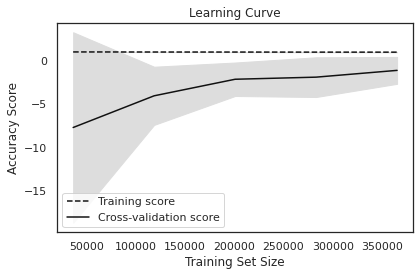

In [0]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(model, 
                                                        X, 
                                                        Y,
                                                        # Number of folds in cross-validation
                                                        cv=5)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [0]:
test_mean

array([-7.73172278, -4.07168978, -2.16112868, -1.91831189, -1.13624289])

In [0]:
#Probamos eliminando algunas columnas con información similar.

X_prima = X.drop(columns =["week","meal_id","center_id","city_code","region_code"], axis=1)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

y = Y
x = X_prima

train_scores, val_scores, train_rmse, val_rmse = [], [], [], []
model = DecisionTreeRegressor(max_depth = 10)

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    val_scores.append(model.score(x_val, y_val))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,model.predict(x_train))))
    val_rmse.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
    
print(f'Score Promedio')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')
print(f'RMSE Promedio')
print(f'Train      = {np.mean(train_rmse):.4}')
print(f'Validation = {np.mean(val_rmse):.4}')

Score Promedio
Train      = 0.7129
Validation = 0.6457
RMSE Promedio
Train      = 210.9
Validation = 234.3


# Random Forest - Regresión

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

y = Y
x = X_prima

base_score, train_scores, val_scores, train_rmse, val_rmse = [], [], [], [], []
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    val_scores.append(model.score(x_val, y_val))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,model.predict(x_train))))
    val_rmse.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
    y_val[:]=Y.mean()
    base_score.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
print(f'Score Promedio')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')
print(f'RMSE Promedio')
print(f'Train      = {np.mean(train_rmse):.4}')
print(f'Validation = {np.mean(val_rmse):.4}')
print(f'Validation = {np.mean(val_rmse):.4}')
print(f'Base Line Compare = {np.mean(base_score):.4}')

#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Score Promedio
Train      = 0.9447
Validation = 0.7727
RMSE Promedio
Train      = 92.54
Validation = 187.6
Validation = 187.6
Base Line Compare = 362.0


# Gradient Boosting Regression

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

y = Y
x = X

base_score, train_scores, val_scores, train_rmse, val_rmse = [], [], [], [], []

model = GradientBoostingRegressor(loss='ls',
                                n_estimators=200, max_depth=8,
                                learning_rate=0.1, min_samples_leaf=8,
                                min_samples_split=8)

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    val_scores.append(model.score(x_val, y_val))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,model.predict(x_train))))
    val_rmse.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
    y_val[:]=Y.mean()
    base_score.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
print(f'Score Promedio')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')
print(f'RMSE Promedio')
print(f'Train      = {np.mean(train_rmse):.4}')
print(f'Validation = {np.mean(val_rmse):.4}')
print(f'Validation = {np.mean(val_rmse):.4}')
print(f'Base Line Compare = {np.mean(base_score):.4}')

Score Promedio
Train      = 0.9089
Validation = 0.8721
RMSE Promedio
Train      = 118.8
Validation = 140.8
Validation = 140.8
Base Line Compare = 358.2


In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

y = Y
x = X_prima

base_score, train_scores, val_scores, train_rmse, val_rmse = [], [], [], [], []

model = GradientBoostingRegressor(loss='ls',
                                n_estimators=200, max_depth=8,
                                learning_rate=0.1, min_samples_leaf=8,
                                min_samples_split=8)

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    val_scores.append(model.score(x_val, y_val))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,model.predict(x_train))))
    val_rmse.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
    y_val[:]=Y.mean()
    base_score.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
print(f'Score Promedio')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')
print(f'RMSE Promedio')
print(f'Train      = {np.mean(train_rmse):.4}')
print(f'Validation = {np.mean(val_rmse):.4}')
print(f'Validation = {np.mean(val_rmse):.4}')
print(f'Base Line Compare = {np.mean(base_score):.4}')

Score Promedio
Train      = 0.819
Validation = 0.7668
RMSE Promedio
Train      = 167.5
Validation = 190.1
Validation = 190.1
Base Line Compare = 340.4
